### **Website Traffic Analysis**


Analyze and identify patterns, seasonal trends, and insights in website traffic data and understanding user behavior and provide recommendations for improving engagement and predicting future trends.

## **Dataset**


**Dataset Overview**
This dataset provides detailed information on website traffic, including page views, session duration, bounce rate, traffic source, time spent on page, previous visits, and conversion rate.

**Dataset Description**

Page Views: The number of pages viewed during a session.

Session Duration: The total duration of the session in minutes.

Bounce Rate: The percentage of visitors who navigate away from the site after viewing only one page.

Traffic Source: The origin of the traffic (e.g., Organic, Social, Paid).

Time on Page: The amount of time spent on the specific page.

Previous Visits: The number of previous visits by the same visitor.

Conversion Rate: The percentage of visitors who completed a desired action (e.g., making a purchase).

**Data Summary**
Total Records: 2000
Total Features: 7

https://www.kaggle.com/datasets/anthonytherrien/website-traffic

## **Data Preparation and Exploration**

**Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Unzipping the dataset
import zipfile

zip_path = "/content/website-traffic.zip"  # 🔁 Replace with your zip file name if different
extract_dir = "/content/"  # 🔁 Replace with the directory where you want to extract the files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Unzipped successfully.")


✅ Unzipped successfully.


**Load and Inspect Data:** Examine the dataset structure, shape, data types, and
first few rows.

In [3]:

df = pd.read_csv('/content/website_data.csv')
df.head()


# Inspect the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (2000, 8)

Column Types:
 Page Views            int64
Session Duration    float64
Bounce Rate         float64
Traffic Source       object
Time on Page        float64
Previous Visits       int64
Conversion Rate     float64
Date                 object
dtype: object

First 5 Rows:
    Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0           5         11.051381     0.230652        Organic      3.890460   
1           4          3.429316     0.391001         Social      8.478174   
2           4          1.621052     0.397986        Organic      9.636170   
3           5          3.629279     0.180458        Organic      2.071925   
4           5          4.235843     0.291541           Paid      1.960654   

   Previous Visits  Conversion Rate        Date  
0                3              1.0  2015-01-01  
1                0              1.0  2015-01-02  
2                2              1.0  2015-01-03  
3                3              1.0  2015-

**Data Cleaning:**

Identify and handle any missing or incorrect values.


In [4]:
print("\n Missing Values:\n", df.isnull().sum())
df.describe()


 Missing Values:
 Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
Date                0
dtype: int64


,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


Ensure dates are in a usable format for time series analysis.

In [5]:

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Display the first few rows with the new index
print(df.head())

            Page Views  Session Duration  Bounce Rate Traffic Source  \
Date                                                                   
2015-01-01           5         11.051381     0.230652        Organic   
2015-01-02           4          3.429316     0.391001         Social   
2015-01-03           4          1.621052     0.397986        Organic   
2015-01-04           5          3.629279     0.180458        Organic   
2015-01-05           5          4.235843     0.291541           Paid   

            Time on Page  Previous Visits  Conversion Rate  
Date                                                        
2015-01-01      3.890460                3              1.0  
2015-01-02      8.478174                0              1.0  
2015-01-03      9.636170                2              1.0  
2015-01-04      2.071925                3              1.0  
2015-01-05      1.960654                5              1.0  


**Basic Statistics:**

Provide summary statistics for key columns, such as Page Views,
Sessions, Bounce Rate, or equivalent metrics.

Check for potential outliers in the Page Views and Bounce Rate columns.

In [6]:
df.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


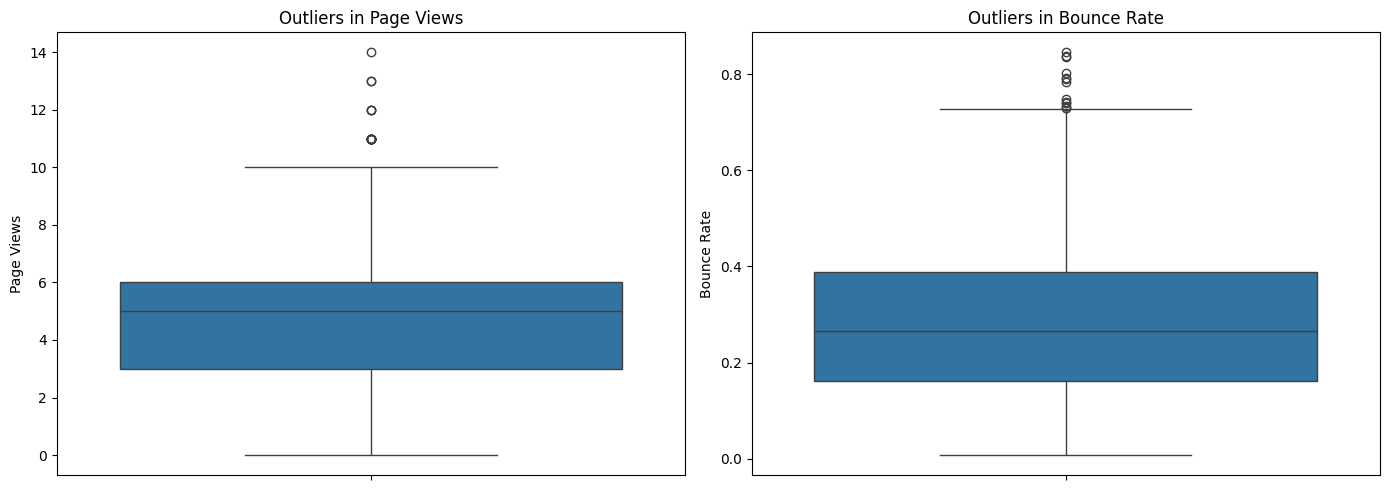

In [7]:
#Boxplots to visualize outliers
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Page Views'])
plt.title('Outliers in Page Views')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Bounce Rate'])
plt.title('Outliers in Bounce Rate')

plt.tight_layout()
plt.show()

## **Exploratory Data Analysis (EDA)**

**Trend Analysis:**

Plot Page Views and Sessions over time to observe general trends in website traffic.

Plot Bounce Rate over time to detect seasonal or monthly changes.

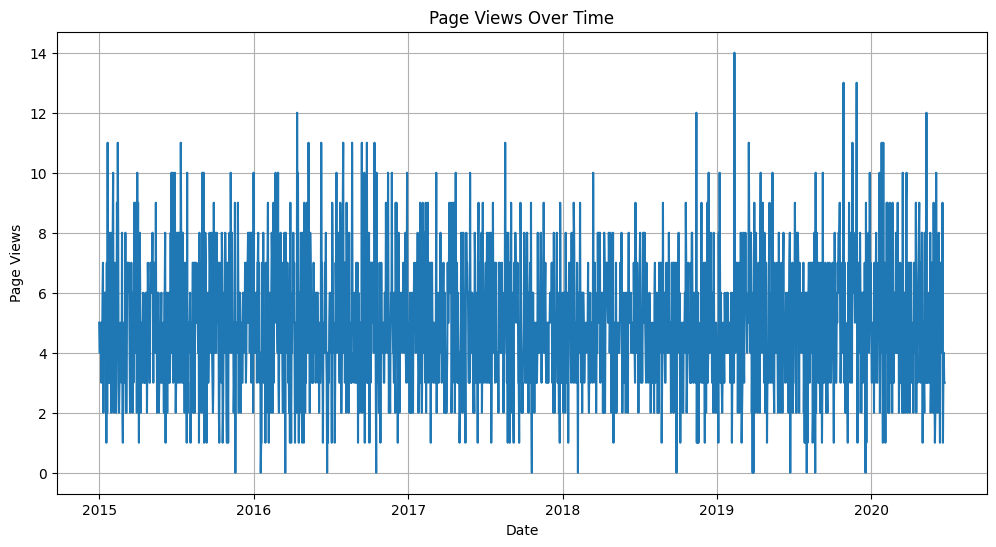

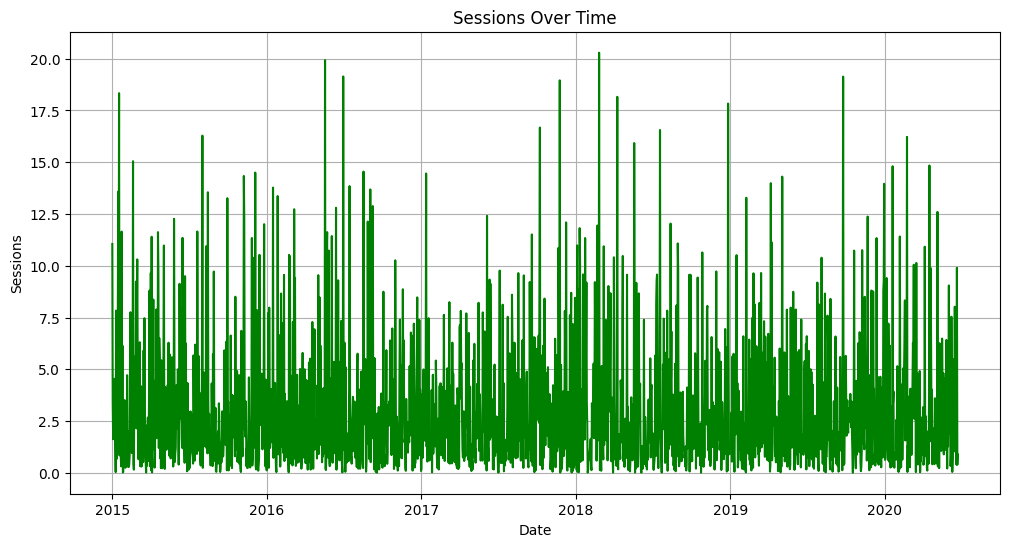

In [13]:
# Plotting Page Views over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Page Views'])
plt.title('Page Views Over Time')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.grid(True)
plt.show()

# Plotting Sessions over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Session Duration'], color='green')
plt.title('Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.grid(True)
plt.show()

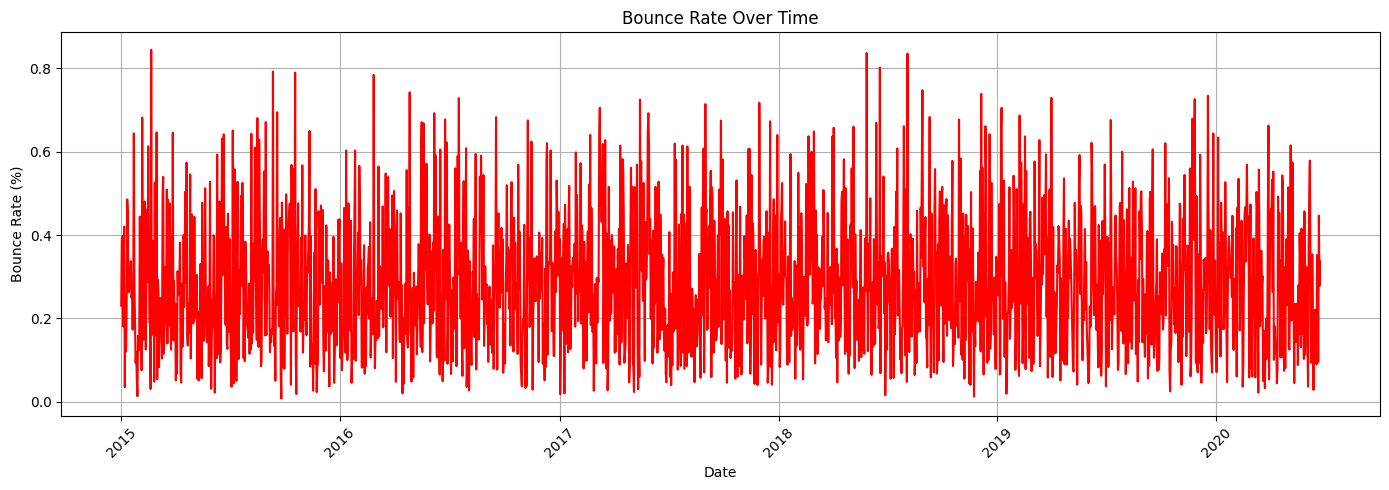

In [15]:
# Plot Bounce Rate over time
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Bounce Rate'], label='Bounce Rate', color='red')
plt.title("Bounce Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Bounce Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


**Traffic Sources Analysis:**

 Pie chart showing the distribution of traffic sources (e.g., Organic, Social, Paid).

Analyze how each traffic source contributes to overall Page Views and Sessions.

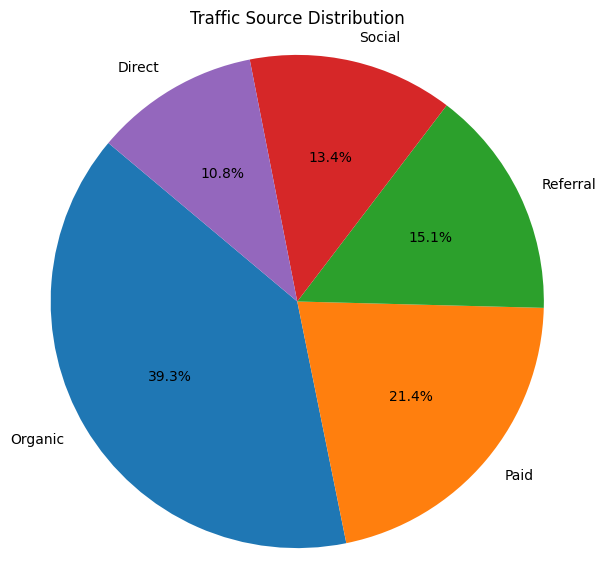

In [16]:

traffic_counts = df['Traffic Source'].value_counts()

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Traffic Source Distribution")
plt.axis('equal')
plt.show()



Traffic Source Contribution to Page Views and Sessions:
   Traffic Source  Page Views  Session Duration
0         Direct        1072        581.484967
1        Organic        3950       2439.898528
2           Paid        2116       1259.525230
3       Referral        1500        940.774311
4         Social        1263        822.406490


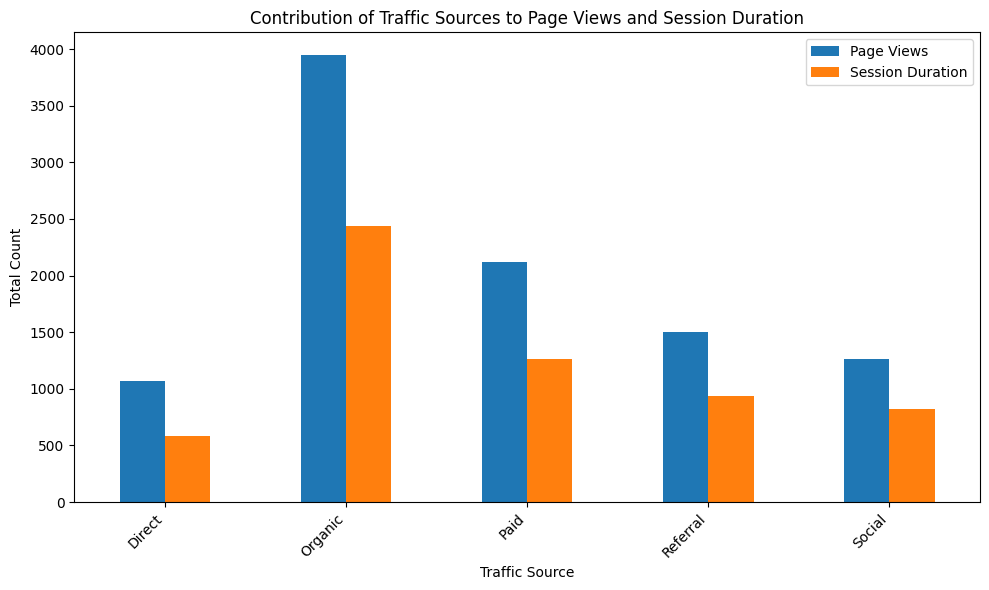

In [17]:
traffic_source_analysis = df.groupby('Traffic Source')[['Page Views', 'Session Duration']].sum().reset_index()

print("\nTraffic Source Contribution to Page Views and Sessions:\n", traffic_source_analysis)

# Visualize the contribution
traffic_source_analysis.set_index('Traffic Source').plot(kind='bar', figsize=(10, 6))
plt.title('Contribution of Traffic Sources to Page Views and Session Duration')
plt.xlabel('Traffic Source')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Seasonal and Trend Analysis**

**Time Series Decomposition:**

Use seasonal decomposition to break down the time series of Page Views
into trend, seasonal, and residual components.

/tmp/ipython-input-21-3498360091.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily = df_daily.fillna(method='ffill')


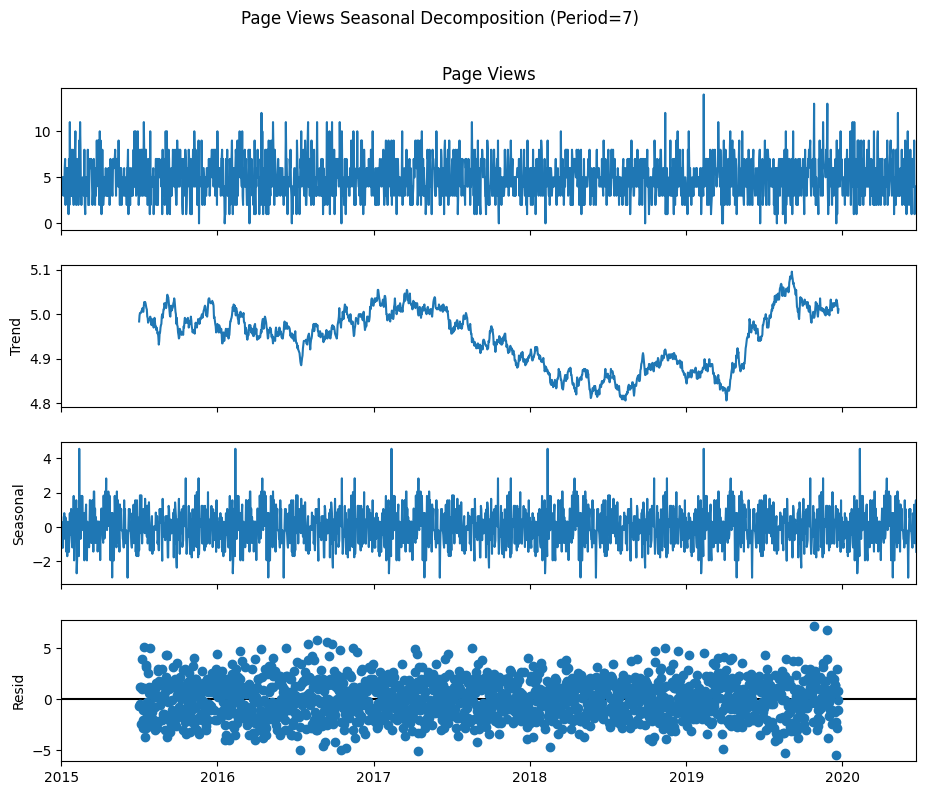


Trend Component:
 Date
2015-01-01   NaN
2015-01-02   NaN
2015-01-03   NaN
2015-01-04   NaN
2015-01-05   NaN
Freq: D, Name: trend, dtype: float64

Seasonal Component:
 Date
2015-01-01    0.559867
2015-01-02   -0.690133
2015-01-03   -1.188763
2015-01-04   -0.942188
2015-01-05   -1.194242
Freq: D, Name: seasonal, dtype: float64

Residual Component:
 Date
2015-01-01   NaN
2015-01-02   NaN
2015-01-03   NaN
2015-01-04   NaN
2015-01-05   NaN
Freq: D, Name: resid, dtype: float64


In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to daily frequency (if not already daily) and handle potential NaNs
# If your data is already daily and without gaps, this might not be strictly necessary
# but it's good practice for decomposition.
df_daily = df['Page Views'].resample('D').mean()

# Handle potential NaNs created by resampling or original data
df_daily = df_daily.fillna(method='ffill')

# Perform seasonal decomposition Model can be 'additive' or 'multiplicative'freq is the number of data points in a seasonal cycle. For daily data with
# potential weekly seasonality, freq=7 is common. If the seasonality is yearly and your data spans years, freq=365 might be more appropriate.
# Let's assume daily data and look for weekly seasonality (freq=7).Adjust freq based on your understanding of the data's seasonality.
decomposition = seasonal_decompose(df_daily, model='additive', period=365) # Adjust period as needed

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Page Views Seasonal Decomposition (Period=7)', y=1.02)
plt.show()

# You can access the components individually:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print("\nTrend Component:\n", trend.head())
print("\nSeasonal Component:\n", seasonal.head())
print("\nResidual Component:\n", residual.head())

**Moving Average and Smoothing:**

Calculate and plot a 30-day moving average for Page Views and Bounce
Rate to smooth out short-term fluctuations and highlight long-term
trends.

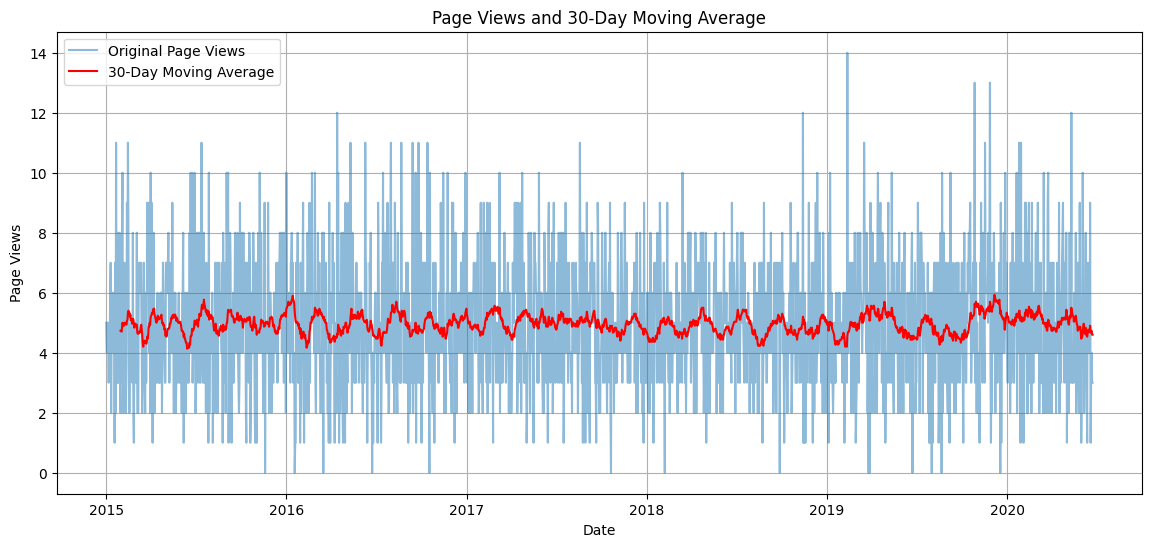

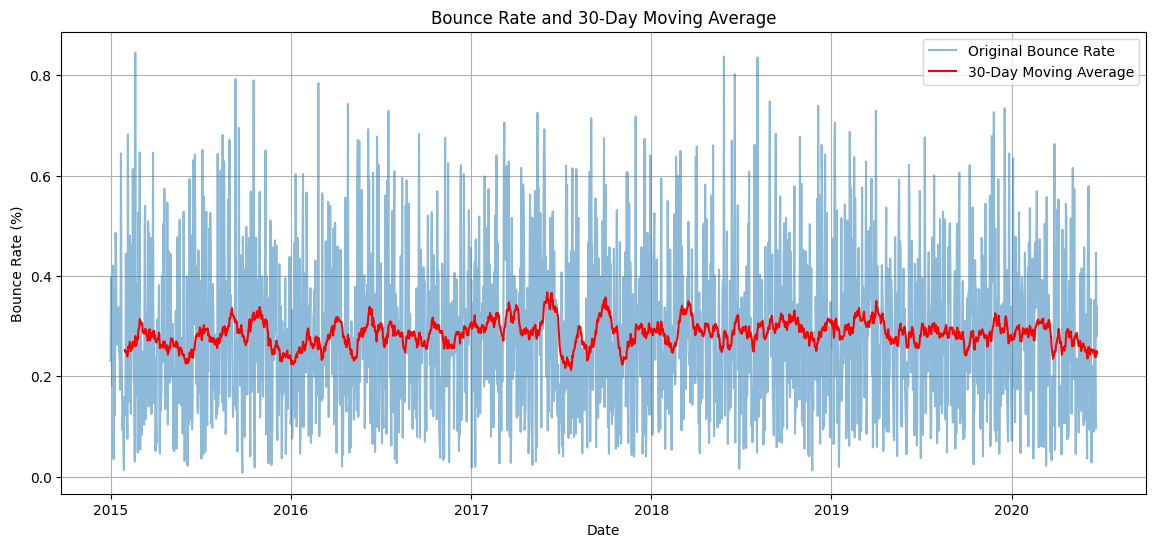

In [19]:
# Calculate 30-day moving average for Page Views and Bounce Rate
df['Page Views_MA30'] = df['Page Views'].rolling(window=30).mean()
df['Bounce Rate_MA30'] = df['Bounce Rate'].rolling(window=30).mean()

# Plot Page Views and its 30-day moving average
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Page Views'], label='Original Page Views', alpha=0.5)
plt.plot(df.index, df['Page Views_MA30'], label='30-Day Moving Average', color='red')
plt.title('Page Views and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend()
plt.grid(True)
plt.show()

# Plot Bounce Rate and its 30-day moving average
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Bounce Rate'], label='Original Bounce Rate', alpha=0.5)
plt.plot(df.index, df['Bounce Rate_MA30'], label='30-Day Moving Average', color='red')
plt.title('Bounce Rate and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Bounce Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

**Monthly and Weekly Patterns:**

Plot the monthly and weekly averages of Page Views and Bounce Rate to
identify high-traffic periods (e.g., weekends, certain months).

/tmp/ipython-input-20-1100220153.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df[['Page Views', 'Bounce Rate']].resample('M').mean()


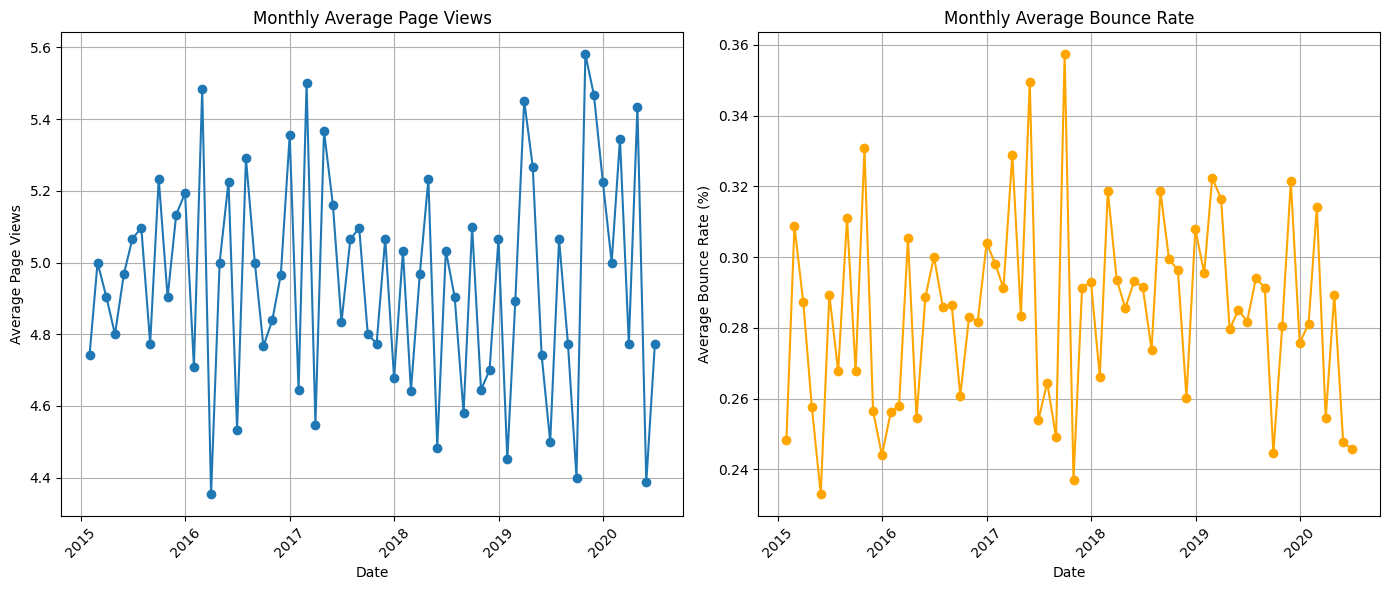

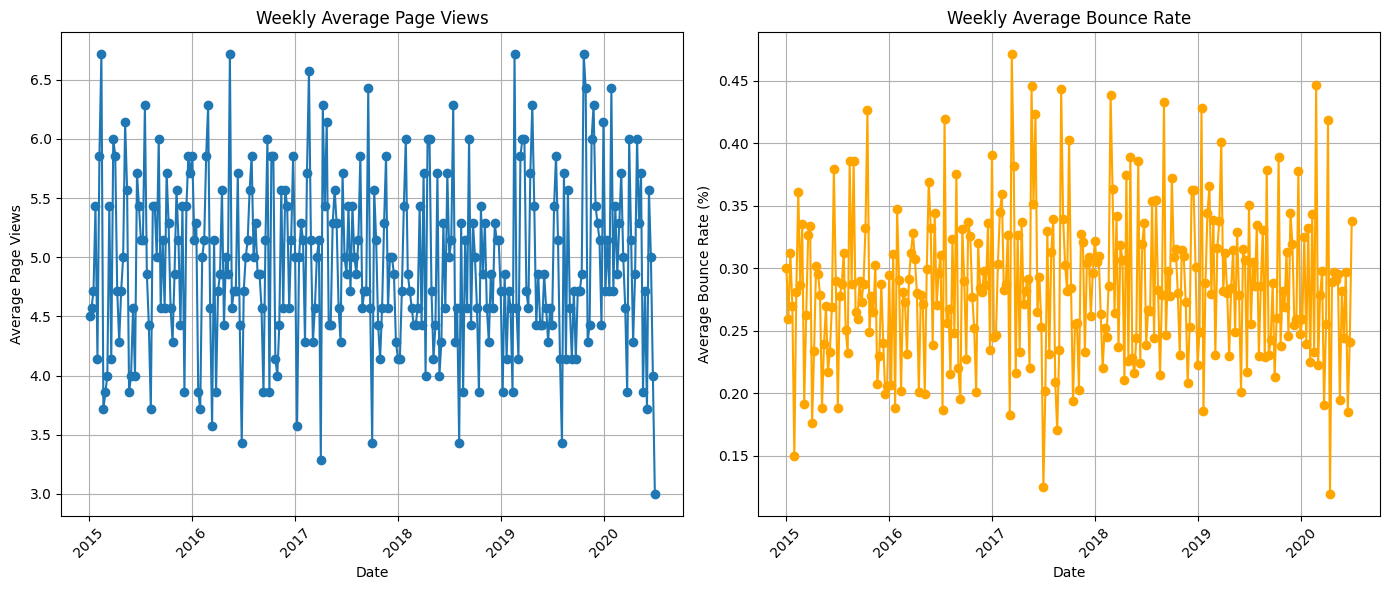

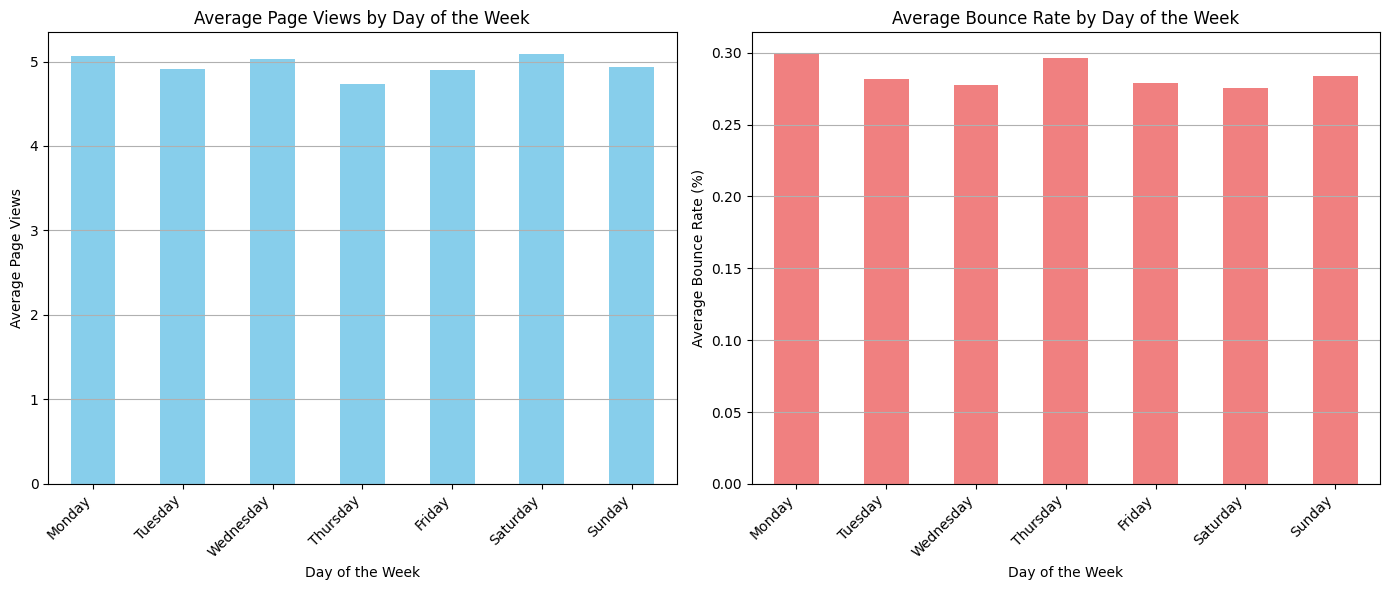

In [20]:
# Resample data to monthly and calculate the mean
monthly_avg = df[['Page Views', 'Bounce Rate']].resample('M').mean()

# Resample data to weekly and calculate the mean
weekly_avg = df[['Page Views', 'Bounce Rate']].resample('W').mean()

# Plotting Monthly Averages
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(monthly_avg.index, monthly_avg['Page Views'], marker='o', linestyle='-')
plt.title('Monthly Average Page Views')
plt.xlabel('Date')
plt.ylabel('Average Page Views')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(monthly_avg.index, monthly_avg['Bounce Rate'], marker='o', linestyle='-', color='orange')
plt.title('Monthly Average Bounce Rate')
plt.xlabel('Date')
plt.ylabel('Average Bounce Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting Weekly Averages
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(weekly_avg.index, weekly_avg['Page Views'], marker='o', linestyle='-')
plt.title('Weekly Average Page Views')
plt.xlabel('Date')
plt.ylabel('Average Page Views')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(weekly_avg.index, weekly_avg['Bounce Rate'], marker='o', linestyle='-', color='orange')
plt.title('Weekly Average Bounce Rate')
plt.xlabel('Date')
plt.ylabel('Average Bounce Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

# Optional: Plot averages by day of the week directly
# Extract the day of the week
df['Day_of_Week'] = df.index.dayofweek # Monday=0, Sunday=6

# Calculate the mean for each day of the week
daily_of_week_avg = df.groupby('Day_of_Week')[['Page Views', 'Bounce Rate']].mean()

# Map day numbers to names for better visualization
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_of_week_avg.index = day_names

# Plotting Averages by Day of the Week
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
daily_of_week_avg['Page Views'].plot(kind='bar', color='skyblue')
plt.title('Average Page Views by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Page Views')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
daily_of_week_avg['Bounce Rate'].plot(kind='bar', color='lightcoral')
plt.title('Average Bounce Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Bounce Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()